In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.naive_bayes as NB
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv('BreastCancer.csv')
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [34]:
data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

All the data types are int64 so there is no need to use labelencoder method to normalize it

In [35]:
target = data['Class']
features = data.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
accuracy = accuracy_score(y_test, y_pred)
print("total_accuracy:", accuracy)

total_accuracy: 0.9562043795620438


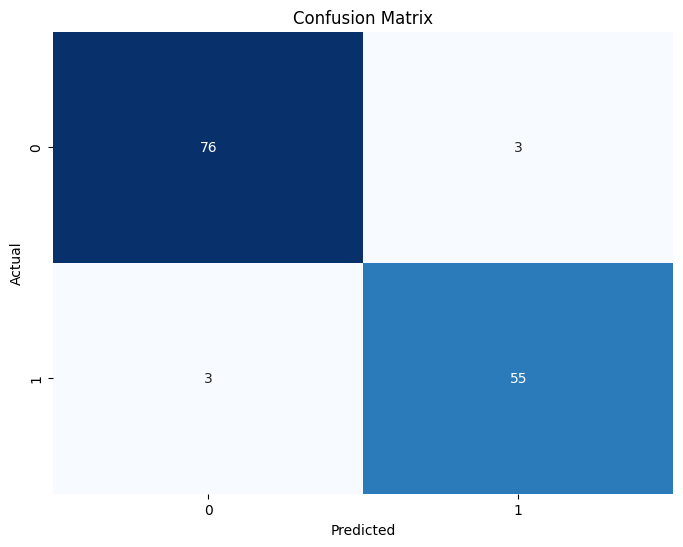

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions on the test set
test_predictions = model.predict(X_test)

# Confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.naive_bayes import GaussianNB

model_g = GaussianNB()
model_g.fit(X_train, y_train)
y_pred_g = model_g.predict(X_test)

Perform cross-validation on the training set

In [40]:
scores = cross_val_score(model, X_train, y_train, cv=10)
accuracy = accuracy_score(y_test, y_pred)
print("total_accuracy:", accuracy)

total_accuracy: 0.9562043795620438


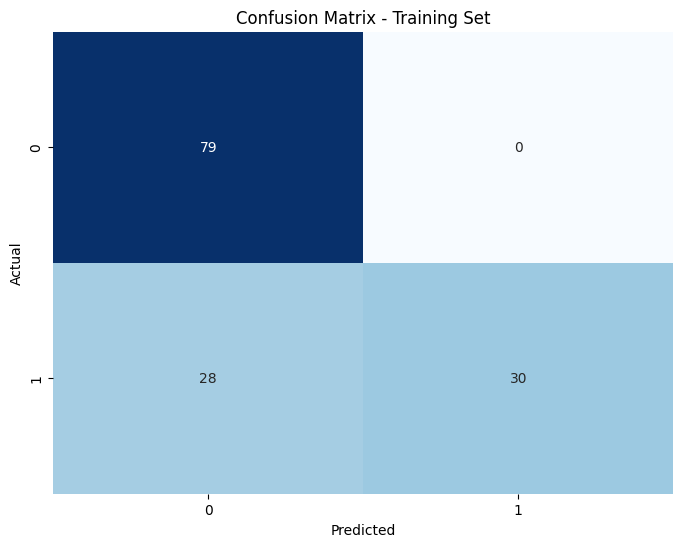

In [41]:
# Predictions on the test set
test_predictions = model_g.predict(X_test)

# Confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()